# Helicorders
The vdapseisutils Helicorder object takes advantage of ObsPy's dayplot for the basic plotting routines. However, it adds functionality:
- more customization
- plotting catalogs and "tags" (and customizing those markers)
- more control over time tick labels and timezones

Examples below show the default behavior as well as advanced behavior.

In [1]:
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
# from vdapseisutils import Helicorder
from vdapseisutils.core.swarmmpl.heli import Helicorder
from vdapseisutils.style.colors import greyscale_hex, swarm_colors_hex

## Default behavior (Gareloi, Alaska)

In [2]:
# Read data from IRIS
# start = UTCDateTime("2021/05/20")
# stop = UTCDateTime("2021/05/21")
# client = Client("IRIS")
# print("Getting waveforms...")
# st = client.get_waveforms("AV", "GALA", "--", "BHZ", start, stop)
# st.write("./output/Helicorders/gareloi_waveform.mseed")

# Or read from file
from obspy import read
st = read("./output/Helicorders/gareloi_waveform.mseed")

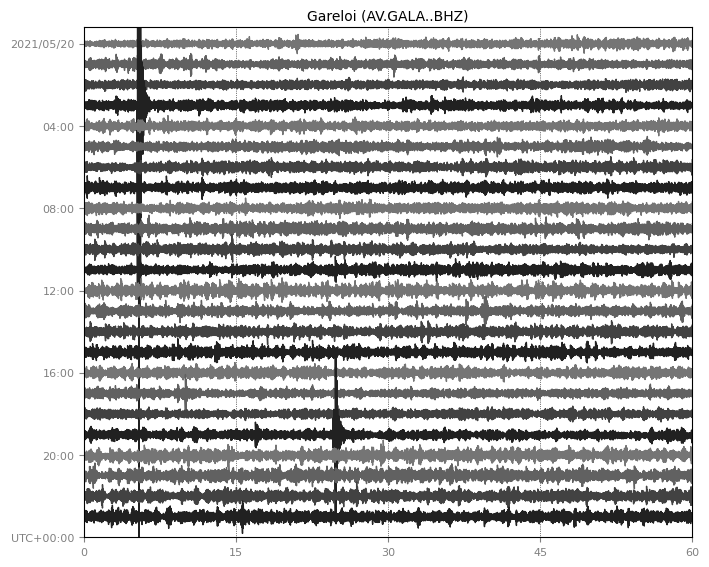

In [3]:
h = Helicorder(st, title="Gareloi (" + st[0].id + ")")
h.savefig("./output/Helicorders/gareloi_helicorder.png")

## Advanced behavior (Goma)

This example shows how to:
- Use colors from SWARM ("blue-scale")
- plot a catalog
- plot tags (timestamps)
- highlight timeperiods
- change the color of the waves

In [4]:
# Download data from IRIS or load from files
# start = UTCDateTime("2021/05/20")
# stop = UTCDateTime("2021/05/21")
# client = Client("IRIS")
# print("Getting waveforms...")
# st = client.get_waveforms("II", "MBAR", "00", "BHZ", start, stop)
# st.write("./output/Helicorders/goma_waveform.mseed")
# print("Getting events...")
# cat = client.get_events(starttime=start, endtime=stop,
#                         # latitude=-1.52, longitude=29.25, maxradius=50/110,
#                         minmagnitude=4.6,
#                         )
# cat.write("./output/Helicorders/goma_events.quakeml", format="QUAKEML")

from obspy import read, read_events
st = read("./output/Helicorders/goma_waveform.mseed")
cat = read_events("./output/Helicorders/goma_events.quakeml")

Creating Helicorder... (60 minute interval)


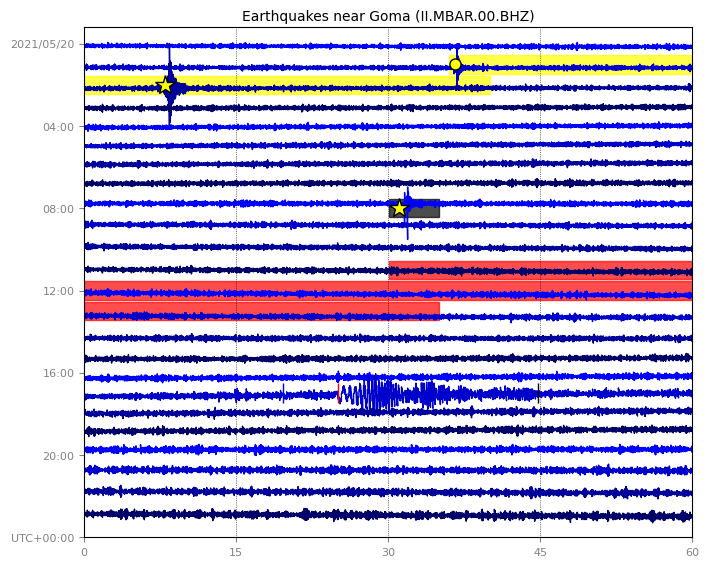

In [5]:
# Make the helicorder
print("Creating Helicorder... (60 minute interval)")
h = Helicorder(st, interval=60, color=swarm_colors_hex,  # define the helicorder specs
                title="Earthquakes near Goma (" + st[0].id + ")",
                )
h.plot_tags(UTCDateTime("2021/05/20 01:36:30"), color="yellow", markersize=8)  # plot a single time
h.plot_tags(UTCDateTime("2021/05/20 17:19:35"), marker="|", markeredgecolor="blue", markersize=15)  # plot a single time as a P arrival
h.plot_tags(UTCDateTime("2021/05/20 17:25:00"), marker="|", markeredgecolor="red", markersize=15)   # plot a single time as a S arrival
h.plot_tags(UTCDateTime("2021/05/20 17:44:45"), marker="|", markeredgecolor="black", markersize=15)  # plot a single time as a coda end
h.plot_tags([UTCDateTime("2021/05/20 08:31:00"), "2021/05/20 02:08:00"], color="yellow", marker="*", markersize=15)  # plot a list of times given in any format
h.highlight([(UTCDateTime("2021/05/20 01:36"), UTCDateTime("2021/05/20 02:40"))])  # spans two lines (at 60')
h.highlight([(UTCDateTime("2021/05/20 08:30"), UTCDateTime("2021/05/20 08:35"))], color="black")  # contained within 1 line (at 60')
h.highlight([(UTCDateTime("2021/05/20 11:30"), UTCDateTime("2021/05/20 13:35"))], color="red")  # spans 3 lines (at 60')
h.savefig("./output/Helicorders/goma_helicorder.png")
plt.show()  # show the helicorder